# Milestone 1 (7th April, 5pm)
10% of the final grade

This is a preliminary milestone to let you set up goals for your final project and assess the feasibility of your ideas. Please, fill the following sections about your project.

(max. 2000 characters per section)

# Dataset
Find a dataset (or multiple) that you will explore. Assess the quality of the data it contains and how much preprocessing / data-cleaning it will require before tackling visualization. We recommend using a standard dataset as this course is not about scraping nor data processing.

Hint: some good pointers for finding quality publicly available datasets (Google dataset search, Kaggle, OpenSwissData, SNAP and FiveThirtyEight), you could use also the DataSets proposed by the ENAC (see the Announcements section on Zulip).

# Problematic
Frame the general topic of your visualization and the main axis that you want to develop.

What am I trying to show with my visualization?
Think of an overview for the project, your motivation, and the target audience.
# Exploratory Data Analysis
Pre-processing of the data set you chose

Show some basic statistics and get insights about the data
# Related work
What others have already done with the data?
Why is your approach original?
What source of inspiration do you take? Visualizations that you found on other websites or magazines (might be unrelated to your data).
In case you are using a dataset that you have already explored in another context (ML or ADA course, semester project...), you are required to share the report of that work to outline the differences with the submission for this class.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from convokit import Corpus, download
import itertools
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Download the dataset
corpus = Corpus(filename=download("friends-corpus"))

Dataset already exists at C:\Users\mateo\.convokit\downloads\friends-corpus


In [60]:
corpus.print_summary_stats()

Number of Speakers: 700
Number of Utterances: 67373
Number of Conversations: 3107


In [61]:
df = corpus.get_utterances_dataframe().reset_index()

In [62]:
df['season'] = df['id'].apply(lambda x: int(x.split("_")[0][1:]))
df['episode'] = df['id'].apply(lambda x: int(x.split("_")[1][1:]))
df['chapter'] = df['id'].apply(lambda x: int(x.split("_")[2][1:]))
df['utterance'] = df['id'].apply(lambda x: int(x.split("_")[3][1:]))

In [63]:
df.head()

,id,timestamp,text,speaker,reply_to,conversation_id,meta.tokens,meta.character_entities,meta.emotion,meta.caption,meta.transcript_with_note,meta.tokens_with_note,vectors,season,episode,chapter,utterance
0,s01_e01_c01_u001,None,There's nothing to tell! He's just some guy I ...,Monica Geller,None,s01_e01_c01_u001,"[[There, 's, nothing, to, tell, !], [He, 's, j...","[[], [[0, 1, Paul the Wine Guy], [4, 5, Paul t...",None,None,None,None,[],1,1,1,1
1,s01_e01_c01_u002,None,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01_e01_c01_u001,s01_e01_c01_u001,"[[C'mon, ,, you, 're, going, out, with, the, g...","[[[2, 3, Monica Geller], [8, 9, Paul the Wine ...",None,None,None,None,[],1,1,1,2
2,s01_e01_c01_u003,None,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01_e01_c01_u002,s01_e01_c01_u001,"[[All, right, Joey, ,, be, nice, .], [So, does...","[[[2, 3, Joey Tribbiani]], [[2, 3, Paul the Wi...",None,None,None,None,[],1,1,1,3
3,s01_e01_c01_u004,None,"Wait, does he eat chalk?",Phoebe Buffay,s01_e01_c01_u003,s01_e01_c01_u001,"[[Wait, ,, does, he, eat, chalk, ?]]","[[[3, 4, Paul the Wine Guy]]]",None,None,None,None,[],1,1,1,4
4,s01_e01_c01_u005,None,,TRANSCRIPT_NOTE,s01_e01_c01_u004,s01_e01_c01_u001,[],[],None,None,"(They all stare, bemused.)","[[(, They, all, stare, ,, bemused, ., )]]",[],1,1,1,5


In [68]:
# Get the utterances from only the main characters
main_characters = ['Monica Geller', 'Ross Geller', 'Phoebe Buffay', 'Joey Tribbiani', 'Chandler Bing', 'Rachel Green']
df_main_char = df[df['speaker'].isin(main_characters)]
df_main_char['num_words'] = df_main_char['text'].apply(lambda x: len(x.split()))
df_main_char.head()

,id,timestamp,text,speaker,reply_to,conversation_id,meta.tokens,meta.character_entities,meta.emotion,meta.caption,meta.transcript_with_note,meta.tokens_with_note,vectors,season,episode,chapter,utterance,num_words
0,s01_e01_c01_u001,None,There's nothing to tell! He's just some guy I ...,Monica Geller,None,s01_e01_c01_u001,"[[There, 's, nothing, to, tell, !], [He, 's, j...","[[], [[0, 1, Paul the Wine Guy], [4, 5, Paul t...",None,None,None,None,[],1,1,1,1,11
1,s01_e01_c01_u002,None,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01_e01_c01_u001,s01_e01_c01_u001,"[[C'mon, ,, you, 're, going, out, with, the, g...","[[[2, 3, Monica Geller], [8, 9, Paul the Wine ...",None,None,None,None,[],1,1,1,2,14
2,s01_e01_c01_u003,None,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01_e01_c01_u002,s01_e01_c01_u001,"[[All, right, Joey, ,, be, nice, .], [So, does...","[[[2, 3, Joey Tribbiani]], [[2, 3, Paul the Wi...",None,None,None,None,[],1,1,1,3,16
3,s01_e01_c01_u004,None,"Wait, does he eat chalk?",Phoebe Buffay,s01_e01_c01_u003,s01_e01_c01_u001,"[[Wait, ,, does, he, eat, chalk, ?]]","[[[3, 4, Paul the Wine Guy]]]",None,None,None,None,[],1,1,1,4,5
5,s01_e01_c01_u006,None,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,s01_e01_c01_u005,s01_e01_c01_u001,"[[Just, ,, ', cause, ,, I, do, n't, want, her,...","[[[5, 6, Phoebe Buffay], [9, 10, Monica Geller...",None,None,None,None,[],1,1,1,6,16


## Who speaks the most?

In [70]:
df_summary = df_main_char.groupby('speaker').sum().reset_index()[['speaker','num_words']]

In [71]:
df_summary['lines'] = df_main_char.groupby('speaker').count().reset_index()[['text']]

In [72]:
df_summary['ratio'] = df_summary['num_words']/df_summary['lines'] 
df_summary = df_summary.sort_values('num_words', ascending=False)
df_summary

,speaker,num_words,lines,ratio
4,Rachel Green,97664,9331,10.466617
5,Ross Geller,95566,9161,10.431831
0,Chandler Bing,86845,8568,10.135971
1,Joey Tribbiani,86530,8215,10.533171
2,Monica Geller,83099,8498,9.778654
3,Phoebe Buffay,81587,7539,10.821992


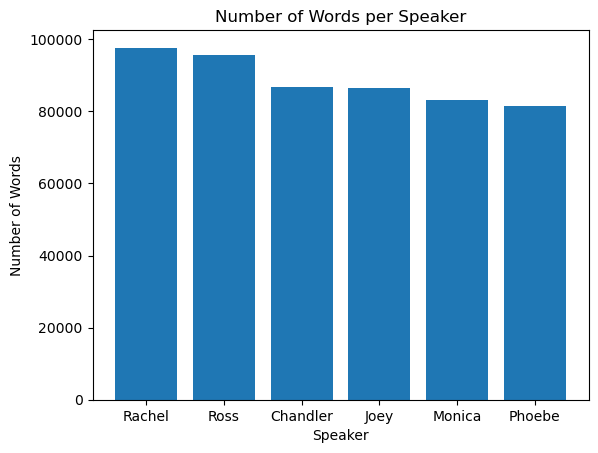

In [73]:
speaker = df_summary['speaker'].apply(lambda x: x.split(" ")[0])
num_words = df_summary['num_words']

plt.bar(speaker, num_words)
plt.xlabel('Speaker')
plt.ylabel('Number of Words')
plt.title('Number of Words per Speaker')

plt.show()

## Who has a wider vocabulary?

In [76]:
# We should lowercase the text in order to avoid adding the same words when they are upper or lowercase
df_simple = df_main_char[['speaker','text']]
df_simple['text'] = df['text'].apply(lambda x: x.lower())
df_simple

,speaker,text
0,Monica Geller,there's nothing to tell! he's just some guy i ...
1,Joey Tribbiani,"c'mon, you're going out with the guy! there's ..."
2,Chandler Bing,"all right joey, be nice. so does he have a hum..."
3,Phoebe Buffay,"wait, does he eat chalk?"
5,Phoebe Buffay,"just, 'cause, i don't want her to go through w..."
...,...,...
67368,Chandler Bing,"oh, it's gonna be okay."
67369,Rachel Green,do you guys have to go to the new house right ...
67370,Monica Geller,we got some time.
67371,Rachel Green,"okay, should we get some coffee?"


In [77]:
# Create a new DataFrame to store the count of unique words for each speaker
unique_words_df = pd.DataFrame(columns=['speaker', 'unique_words'])

# Iterate through the unique speakers
for speaker in df_simple['speaker'].unique():
    # Filter the DataFrame for the current speaker
    speaker_df = df_simple[df_simple['speaker'] == speaker]

    # Concatenate all the text and split it into words
    words = ' '.join(speaker_df['text']).split()

    # Count the unique words
    unique_word_count = len(set(words))

    # Append the result to the unique_words_df DataFrame
    unique_words_df = unique_words_df.append({'speaker': speaker, 'unique_words': unique_word_count}, ignore_index=True)

# Sort the unique_words_df DataFrame by the 'unique_words' column in descending order
sorted_unique_words_df = unique_words_df.sort_values('unique_words', ascending=False)

# Display the sorted DataFrame
sorted_unique_words_df

,speaker,unique_words
4,Ross Geller,11571
2,Chandler Bing,11183
5,Rachel Green,10634
1,Joey Tribbiani,10601
3,Phoebe Buffay,10466
0,Monica Geller,9970


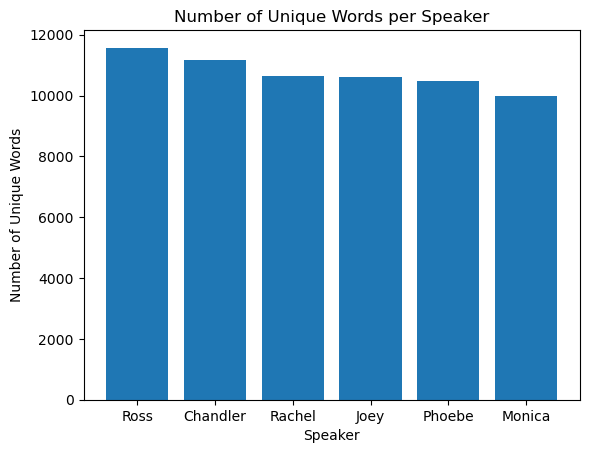

In [78]:
# Get the speaker and unique_words columns from the sorted DataFrame
speaker = sorted_unique_words_df['speaker'].apply(lambda x: x.split(" ")[0])
unique_words = sorted_unique_words_df['unique_words']

plt.bar(speaker, unique_words)
plt.xlabel('Speaker')
plt.ylabel('Number of Unique Words')
plt.title('Number of Unique Words per Speaker')

plt.show()

## Which pair of characters interact the most?

In [79]:
# Create an empty graph
G = nx.Graph()
# Group the DataFrame by conversation_id
grouped = df_main_char.groupby('conversation_id')

for conversation_id, conversation_df in grouped:
    # Get the unique speakers in the conversation
    speakers = conversation_df['speaker'].unique()

    # Iterate through all pairs of speakers in the conversation
    for speaker1, speaker2 in itertools.combinations(speakers, 2):
        # If the pair of speakers has an edge, increase the edge weight by 1
        if G.has_edge(speaker1, speaker2):
            G[speaker1][speaker2]['weight'] += 1
        # If the pair of speakers doesn't have an edge, create one with weight 1
        else:
            G.add_edge(speaker1, speaker2, weight=1)

In [80]:
# Get the list of edges with their weights
edges_with_weights = [(n1, n2, d['weight']) for n1, n2, d in G.edges(data=True)]

# Sort the edges by their weights in descending order
sorted_edges = sorted(edges_with_weights, key=lambda x: x[2], reverse=True)

# Print the sorted edges with their weights
for n1, n2, weight in sorted_edges:
    print(f"{n1} <-> {n2}: {weight}")

Monica Geller <-> Chandler Bing: 976
Joey Tribbiani <-> Chandler Bing: 925
Ross Geller <-> Rachel Green: 861
Monica Geller <-> Phoebe Buffay: 821
Monica Geller <-> Rachel Green: 798
Phoebe Buffay <-> Rachel Green: 786
Chandler Bing <-> Ross Geller: 754
Joey Tribbiani <-> Rachel Green: 728
Monica Geller <-> Joey Tribbiani: 726
Joey Tribbiani <-> Ross Geller: 722
Joey Tribbiani <-> Phoebe Buffay: 711
Chandler Bing <-> Phoebe Buffay: 703
Chandler Bing <-> Rachel Green: 690
Monica Geller <-> Ross Geller: 683
Phoebe Buffay <-> Ross Geller: 672


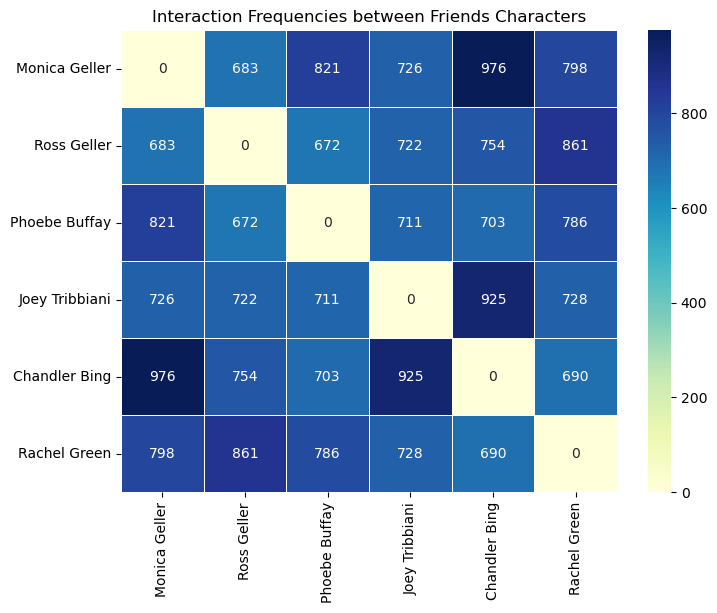

In [81]:
# Create an empty dataframe for the heatmap
heatmap_data = pd.DataFrame(np.zeros((6, 6)), columns=main_characters, index=main_characters)

# Fill in the interaction frequencies from your sorted_edges
for n1, n2, weight in sorted_edges:
    heatmap_data.loc[n1, n2] = weight
    heatmap_data.loc[n2, n1] = weight

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Interaction Frequencies between Friends Characters")
plt.show()

## What are each character's most common words?

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


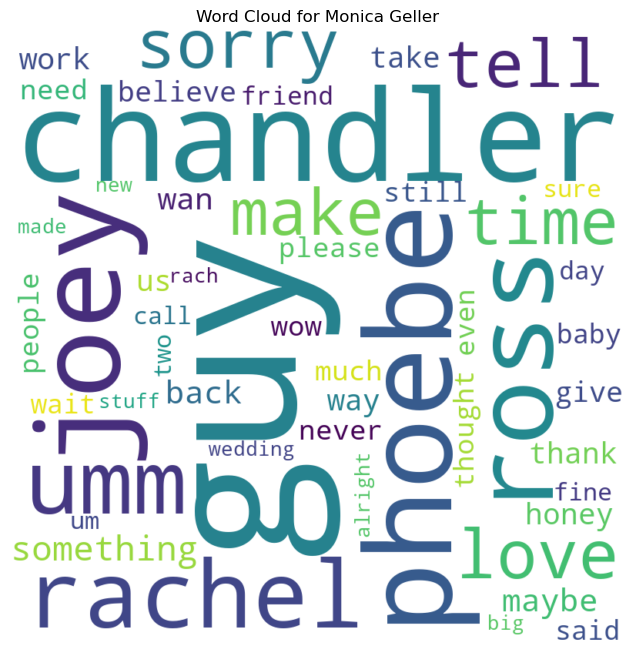

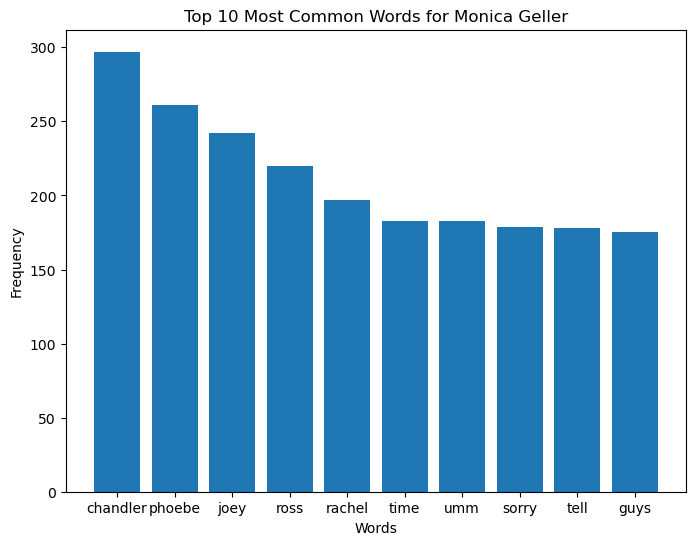

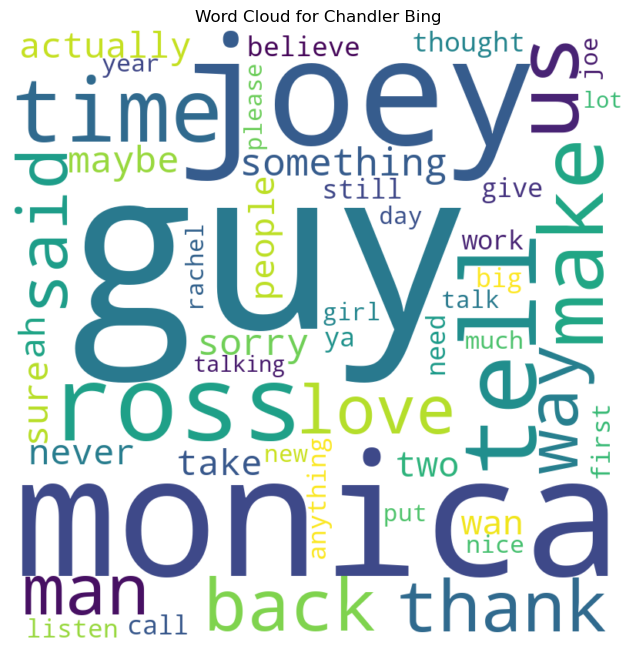

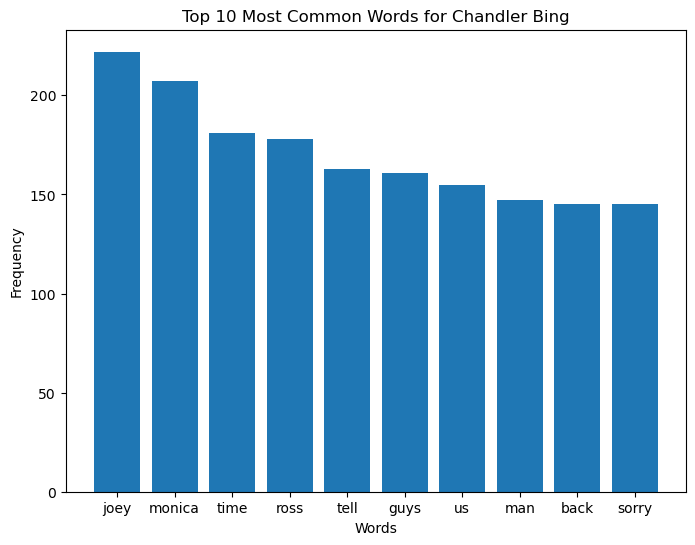

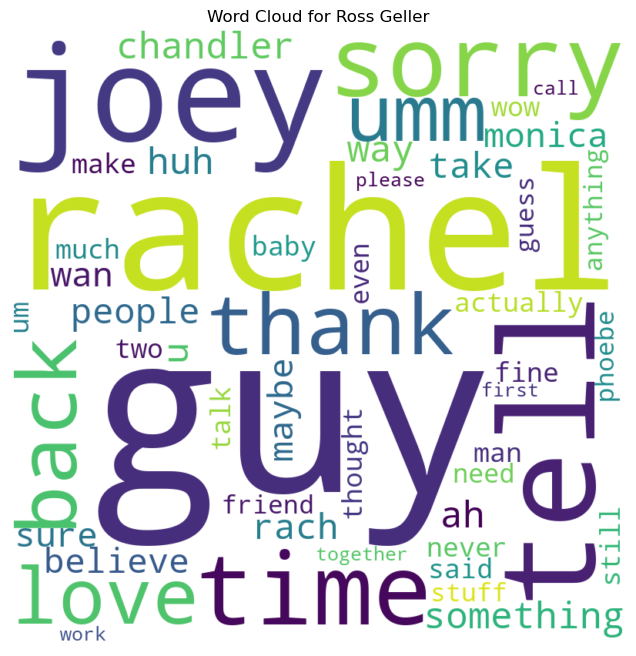

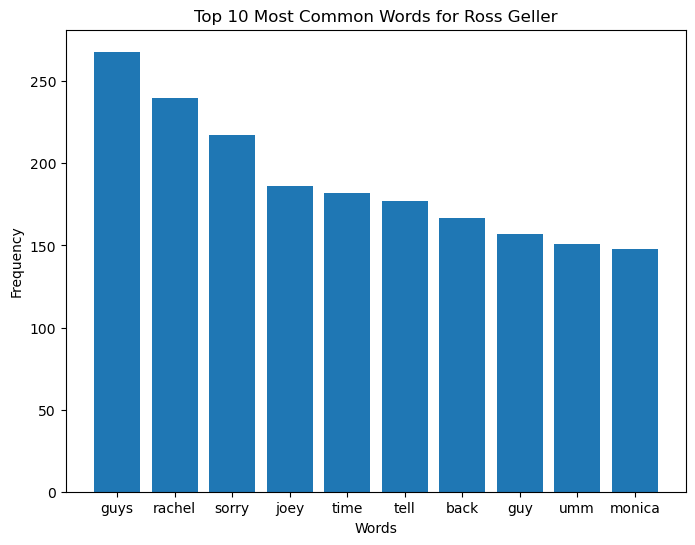

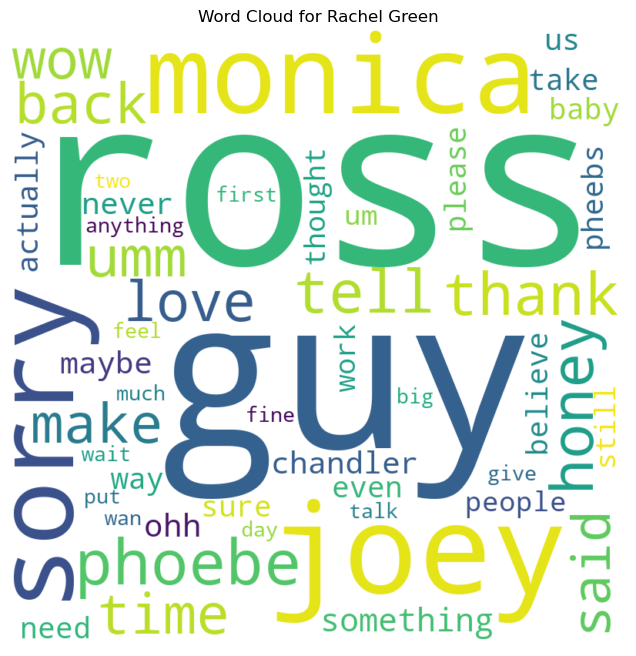

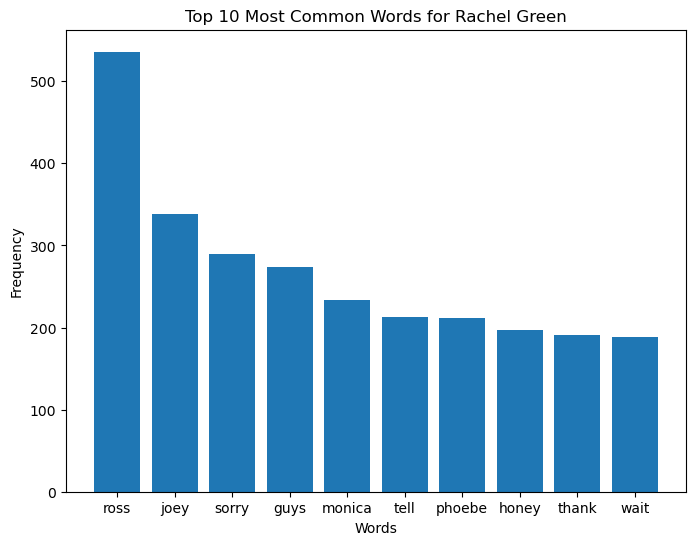

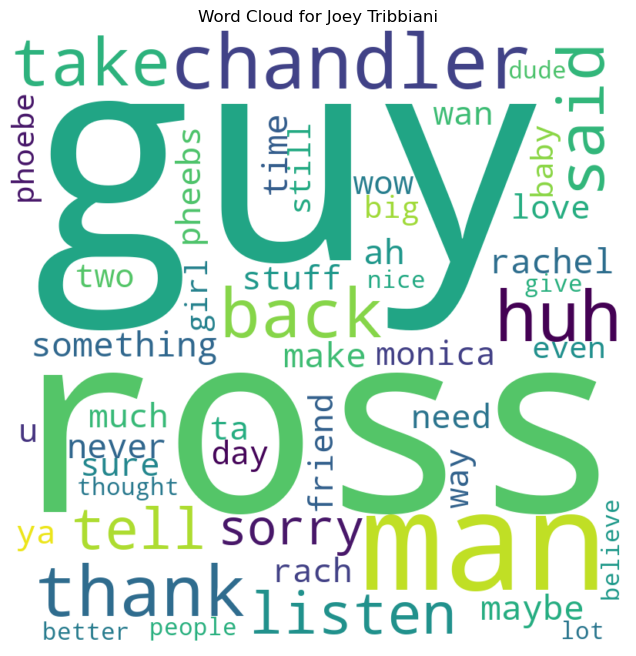

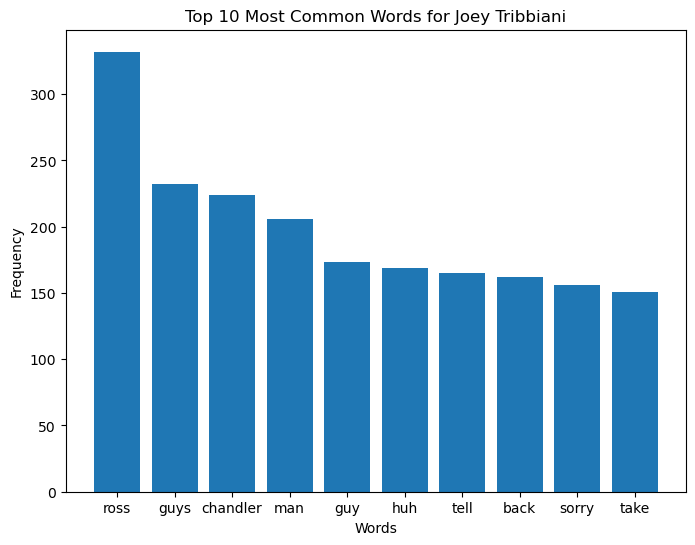

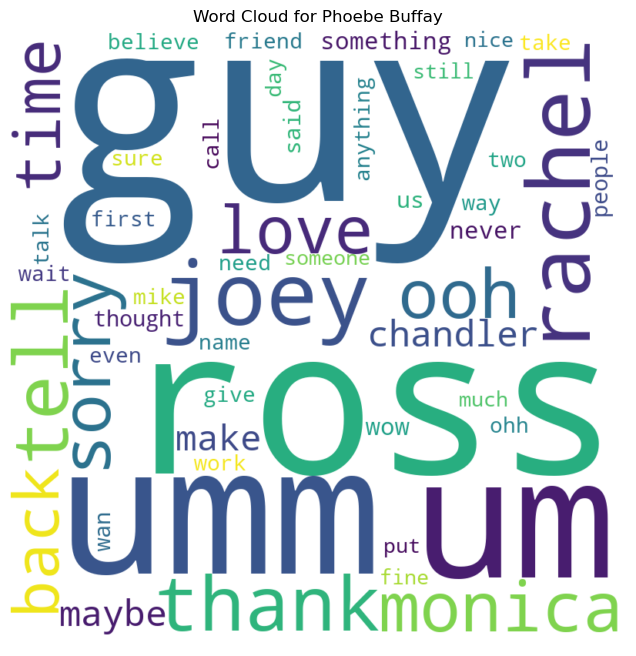

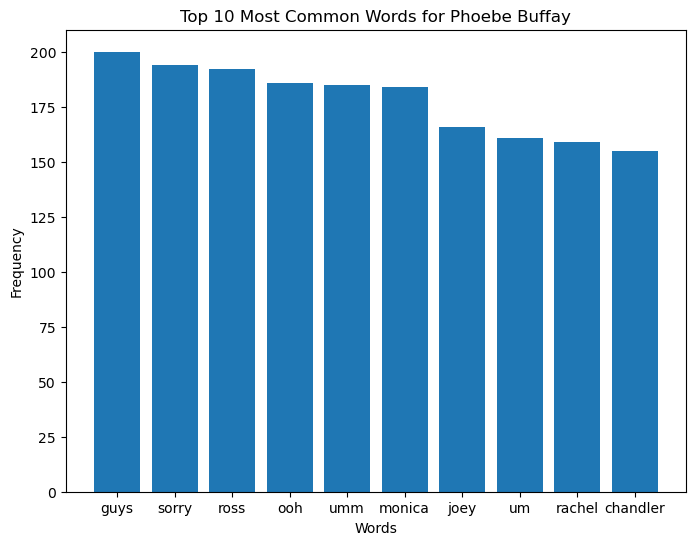

In [82]:
# Make sure to download the stopwords from NLTK
nltk.download('stopwords')
with open('stopwords.txt', 'r') as f:
    custom_stopwords = set(f.read().splitlines())

# Filter the dataframe to keep only the main characters
main_characters = ['Monica Geller', 'Chandler Bing', 'Ross Geller', 'Rachel Green', 'Joey Tribbiani', 'Phoebe Buffay']
df_main_characters = df[df['speaker'].isin(main_characters)]

# Function to preprocess the text and return a list of words
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]  # Keep only words containing alphabetical characters
    nltk_stopwords = set(stopwords.words('english'))
    combined_stopwords = nltk_stopwords.union(custom_stopwords)
    words = [word for word in words if word not in combined_stopwords]  # Remove both NLTK and custom stopwords
    return words

# Analyze the most common words for each character
for character in main_characters:
    # Filter the dataframe for the current character
    df_character = df_main_characters[df_main_characters['speaker'] == character]
    
    # Preprocess the text and create a list of words for the character
    words = []
    for text in df_character['text']:
        words.extend(preprocess_text(text))
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(words))
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {character}')
    plt.show()
    
    # Create a bar chart of the top 10 most common words
    word_counts = Counter(words).most_common(10)
    words, counts = zip(*word_counts)
    plt.figure(figsize=(8, 6))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Common Words for {character}')
    plt.show()

## What are each character's most common n-grams

In [83]:
n = 2

def preprocess_text(text, n):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]
    nltk_stopwords = set(stopwords.words('english'))
    combined_stopwords = nltk_stopwords.union(custom_stopwords)
    words = [word for word in words if word not in combined_stopwords]

    ngrams = list(nltk.ngrams(words, n))
    
    return words, ngrams

def get_top_k_n_grams(k,n):
    word_counts = defaultdict(Counter)
    ngram_counts = defaultdict(Counter)

    for _, row in df_main_characters.iterrows():
        speaker = row['speaker']
        text = row['text']
        words, ngrams = preprocess_text(text, n)
        word_counts[speaker].update(words)
        ngram_counts[speaker].update(ngrams)

    # Display most common n-grams for each character
    for character, ngram_counter in ngram_counts.items():
        print(f"{character}'s most common {n}-grams:")
        for ngram, count in ngram_counter.most_common(k):
            print(f"  {ngram}: {count}")
        print()

get_top_k_n_grams(10,2)

Monica Geller's most common 2-grams:
  ('wait', 'minute'): 36
  ('high', 'school'): 22
  ('wait', 'wait'): 20
  ('big', 'deal'): 18
  ('mom', 'dad'): 17
  ('getting', 'married'): 17
  ('last', 'night'): 16
  ('tell', 'us'): 12
  ('thank', 'much'): 12
  ('first', 'time'): 12

Joey Tribbiani's most common 2-grams:
  ('wait', 'minute'): 29
  ('big', 'deal'): 28
  ('joey', 'tribbiani'): 28
  ('last', 'night'): 24
  ('days', 'lives'): 23
  ('wait', 'wait'): 22
  ('tell', 'ya'): 22
  ('whoa', 'whoa'): 21
  ('monica', 'chandler'): 18
  ('take', 'care'): 16

Chandler Bing's most common 2-grams:
  ('last', 'night'): 25
  ('big', 'deal'): 24
  ('wait', 'minute'): 24
  ('joey', 'joey'): 19
  ('chandler', 'bing'): 18
  ('last', 'time'): 15
  ('new', 'york'): 15
  ('every', 'time'): 12
  ('first', 'time'): 11
  ('next', 'time'): 11

Phoebe Buffay's most common 2-grams:
  ('la', 'la'): 32
  ('wait', 'wait'): 28
  ('smelly', 'cat'): 24
  ('last', 'night'): 19
  ('sorry', 'sorry'): 19
  ('ooh', 'ooh')

In [ ]:
get_top_k_n_grams(10,5)